In [81]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [82]:
df_eventos = pd.read_csv("F:/Bibliotecas/Documentos/football-events/events.csv") #dt
df_dados_partida = pd.read_csv("F:/Bibliotecas/Documentos/football-events/ginf.csv") #dtt

In [83]:
df_eventos.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [84]:
evento_tentativa = 1 #Define o evento como tentativa de gol
na_meta = 1 
gol_true = 1         #Define o evento como gol
gol_false = 0        #Define que o evento não foi gol
penalti_concedido = 11  #Define que o 'event_type' foi penalti
alema = 'D1'
inglesa = 'E0'
espanhola = 'SP1'
italiana = 'I1'
francesa = 'F1'

In [85]:
##TRABALHANDO NOS VALORES DOS GOLS E TENTATIVAS

In [86]:
##Pegar colunas especificas do DataFrame, correspondente as finalizações
df_nova_eventos = df_eventos[['id_odsp', 'id_event', 'sort_order', 'text', 'event_type', 'event_type2','side', 'event_team',
                              'opponent','player', 'player2', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
                              'assist_method', 'situation']] #dct

In [87]:
df_dados_partida = df_dados_partida[['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag']]

# 1.	QUAL O PERCENTUAL DE ACERTOS NOS CHUTES DOS CLUBES?

## Reduzindo os dados do DataFrame para os desejados

### Guardando os valores de tentativas que foram gols

In [88]:
df_gols = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa) & (df_nova_eventos['is_goal'] == gol_true)
                          & (df_nova_eventos['shot_outcome'] >= na_meta)]

### Guardando os registros de tentativas que não foram gols

In [89]:
df_tentativas = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa)]
## &(df_nova_eventos['is_goal'] == gol_false)

In [90]:
df_gols.columns


Index(['id_odsp', 'id_event', 'sort_order', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
       'assist_method', 'situation'],
      dtype='object')

In [91]:
##ACIMA A TENTATIVA DE RESPONDER A QUESTÃO 1 (EM ANDAMENTO)

In [92]:
##Construindo um DataFrame com os valores necessários da tabela Ginf
dados_partida = df_dados_partida.columns[:-9] ##Não funciona (DESSA FORMA SÓ COPIA OS INDEXS)

In [93]:
df_dados_partida.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0


## Criando uma junção natural entre os dois dataframes

In [94]:
gols = pd.merge(df_gols, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [95]:
gols[(gols['season'] == 2013) & (gols['league'] == inglesa)]

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,event_team,opponent,player,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag


#### Devido a falta de informações do campeonato inglês das temporadas de 2012 e 2013, decidi retirar da análise geral com os outros campeonatos. 

In [96]:
gols.drop(gols[(gols.league == inglesa)].index, inplace = True)  ## (inplace = True) Substitui o dataframe pela saída do método

## Agrupando os dados por time e temporada

In [97]:
##Agrupando o quantitativo de gols de cada time por temporada
gols_temporada = gols.groupby(['event_team', 'season']).count()

gols_temp_geral = gols_temporada = gols.groupby(['event_team']).count()

### Exibindo os gols de cada time por temporada

In [98]:
gols_temporada.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,110,110,110,110,110,76,110,110,110,76,...,110,110,110,110,110,110,110,110,110,110
AC Milan,320,320,320,320,320,203,320,320,320,201,...,320,320,320,320,320,320,320,320,320,320
AJ Auxerre,46,46,46,46,46,29,46,46,46,29,...,46,46,46,46,46,46,46,46,46,46
AS Monaco,228,228,228,228,228,149,228,228,228,147,...,228,228,228,228,228,228,228,228,228,228
AS Nancy Lorraine,87,87,87,87,87,63,87,87,87,63,...,87,87,87,87,87,87,87,87,87,87


## Reazlizando uma junção dos dataframes

In [99]:
##Agrupando o quantitativo de gols de cada time por temporada
df_tentativas_temporada = pd.merge(df_tentativas, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

##### Removendo as tentativas do campeonato Inglês

In [100]:
df_tentativas_temporada.drop(df_tentativas_temporada[(df_tentativas_temporada.league == inglesa)].index, inplace = True)

#### Separando 2 dataframes, um agrupado por clube e outro por clube e emporada

In [101]:
tentativas_temporada = df_tentativas_temporada.groupby(['event_team', 'season']).count()

tentativas_temp_geral = df_tentativas_temporada.groupby(['event_team']).count()

In [102]:
tentativas_temp_geral.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,1106,1106,1106,1106,1106,766,1106,1106,1106,762,...,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106
AC Milan,3065,3065,3065,3065,3065,2211,3065,3065,3065,2200,...,3065,3065,3065,3065,3065,3065,3065,3065,3065,3065
AJ Auxerre,446,446,446,446,446,302,446,446,446,302,...,446,446,446,446,446,446,446,446,446,446
AS Monaco,1665,1665,1665,1665,1665,1226,1665,1665,1665,1219,...,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665
AS Nancy Lorraine,1058,1058,1058,1058,1058,792,1058,1058,1058,789,...,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058


#### Medindo a eficiencia por clube e temporada

In [103]:
eficiencia = (gols_temporada['id_event']/tentativas_temporada['id_event']) ##Questionar ao professor

In [104]:
eficiencia.head()

event_team  season
AC Ajaccio  2012      0.310734
            2013      0.273632
            2014      0.314286
AC Milan    2012      0.573477
            2013      0.501567
Name: id_event, dtype: float64

#### Medindo a eficiencia geral por clube

In [105]:
eficiencia_geral = (gols_temporada['id_event']/tentativas_temp_geral['id_event'])

In [106]:
eficiencia_geral.head()

event_team
AC Ajaccio           0.099458
AC Milan             0.104405
AJ Auxerre           0.103139
AS Monaco            0.136937
AS Nancy Lorraine    0.082231
Name: id_event, dtype: float64

#### Convertendo os objetos de Series para Frames, para poder utilizar os métodos da biblioteca matplotlib

In [107]:
df_eficiencia_geral = eficiencia_geral.to_frame()

In [108]:
df_eficiencia_geral.columns

Index(['id_event'], dtype='object')

In [109]:
df_eficiencia = eficiencia.to_frame()

#### Dados gerais do DataFrame de eficiencia geral

In [110]:
df_eficiencia_geral.describe()

,id_event
count,116.000000
mean,0.097970
std,0.019987
min,0.046341
25%,0.084944
50%,0.099255
75%,0.107677
max,0.177219


#### Reduzindo os dados por meio do histograma de eficiencia geral dos campeonatos

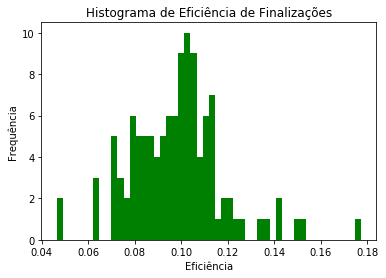

In [111]:
plt.title("Histograma de Eficiência de Finalizações")
plt.xlabel('Eficiência')
plt.ylabel('Frequência')

hist_eficiencia = plt.hist(df_eficiencia_geral['id_event'], facecolor="green", bins = 50)


In [112]:
plt.show()

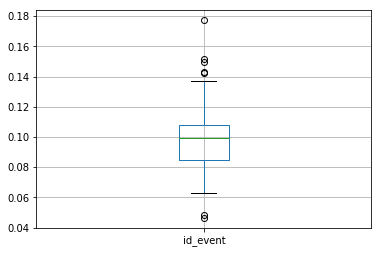

In [113]:
df_eficiencia_geral.boxplot(column='id_event')

In [114]:
dfe = eficiencia_geral.to_frame()

#### Time com maior eficiência

In [115]:
dfe[(dfe['id_event'] == dfe['id_event'].max() )]


,id_event
event_team,
Barcelona,0.177219


#### Time com menor eficiência

In [116]:
dfe[(dfe['id_event'] == dfe['id_event'].min() )]

,id_event
event_team,
Kaiserslautern,0.046341


##### Percebe-se que um dos prováveis motivos de o Barcelona ser um dos melhores clubes do mundo pode estar diretamente relacionado ao alto índice de precisão em finalizações, acima da média dos demais clubes, sendo visto como outlier, conseguindo marcar 2 gols a cada 10 finalizações, em um quantitativo de 5 temporadas.

# 2.	QUAIS LIGAS TEM OS JOGOS MAIS VIOLENTOS?


In [117]:
falta = 3
df_faltas = df_nova_eventos[(df_nova_eventos['event_type'] == falta)]

#### Criando um DT associativo entre os dataframes

In [118]:
##df_ff = df_faltas[(df_faltas['id_odsp'] == 'UFot0hit/')]

In [119]:
df_faltas_union = pd.merge(df_faltas, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [120]:
df_faltas_agrupadas = df_faltas_union.groupby(['event_team'])

In [121]:
 #DATAFRAMES DE FALTAS DO CAMPEONATO ALEMÃO
df_faltas_alema_2012 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_alema_2013 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_alema_2014 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_alema_2015 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_alema_2016 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2016)]

#DATAFRAMES DE FALTAS DO CAMPEONATO INGLES
df_faltas_inglesa_2012 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_inglesa_2013 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_inglesa_2014 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_inglesa_2015 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_inglesa_2016 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2016)]
    
#DATAFRAMES DE FALTAS DO CAMPEONATO ESPANHOL
df_faltas_espanhola_2012 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_espanhola_2013 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_espanhola_2014 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_espanhola_2015 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_espanhola_2016 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2016)]

#DATAFRAMES DE FALTAS DO CAMPEONATO ITALIANO  
df_faltas_italiana_2012 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_italiana_2013 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_italiana_2014 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_italiana_2015 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_italiana_2016 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2016)]
    
#DATAFRAMES DE FALTAS DO CAMPEONATO FRANCES
df_faltas_francesa_2012 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_francesa_2013 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_francesa_2014 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_francesa_2015 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_francesa_2016 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2016)]

#### Contando as partidas do campeonato alemão

In [122]:
df_partidas_alema_2012 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2012)]
df_partidas_alema_2013 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2013)]
df_partidas_alema_2014 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2014)]
df_partidas_alema_2015 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2015)]
df_partidas_alema_2016 = df_dados_partida[(df_dados_partida['league'] == alema) & (df_dados_partida['season'] == 2016)]

alema_league_2012 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2013 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2014 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2015 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2016 = df_partidas_alema_2012['id_odsp'].count()


In [123]:
indice_alema_2012 = df_faltas_alema_2012['id_odsp'].count()/alema_league_2012
indice_alema_2013 = df_faltas_alema_2013['id_odsp'].count()/alema_league_2013
indice_alema_2014 = df_faltas_alema_2014['id_odsp'].count()/alema_league_2014
indice_alema_2015 = df_faltas_alema_2015['id_odsp'].count()/alema_league_2015
indice_alema_2016 = df_faltas_alema_2016['id_odsp'].count()/alema_league_2016

#### Contando as partidas do campeonato Inglês

In [124]:
df_partidas_inglesa_2012 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2012)]
df_partidas_inglesa_2013 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2013)]
df_partidas_inglesa_2014 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2014)]
df_partidas_inglesa_2015 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2015)]
df_partidas_inglesa_2016 = df_dados_partida[(df_dados_partida['league'] == inglesa) & (df_dados_partida['season'] == 2016)]

inglesa_league_2012 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2013 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2014 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2015 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2016 = df_partidas_inglesa_2012['id_odsp'].count()

In [125]:
indice_inglesa_2012 = df_faltas_inglesa_2012['id_odsp'].count()/inglesa_league_2012
indice_inglesa_2013 = df_faltas_inglesa_2013['id_odsp'].count()/inglesa_league_2013
indice_inglesa_2014 = df_faltas_inglesa_2014['id_odsp'].count()/inglesa_league_2014
indice_inglesa_2015 = df_faltas_inglesa_2015['id_odsp'].count()/inglesa_league_2015
indice_inglesa_2016 = df_faltas_inglesa_2016['id_odsp'].count()/inglesa_league_2016

#### Contando as partidas do campeonato Espanhol

In [126]:
df_partidas_espanhola_2012 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2012)]
df_partidas_espanhola_2013 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2013)]
df_partidas_espanhola_2014 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2014)]
df_partidas_espanhola_2015 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2015)]
df_partidas_espanhola_2016 = df_dados_partida[(df_dados_partida['league'] == espanhola) & (df_dados_partida['season'] == 2016)]

espanhola_league_2012 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2013 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2014 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2015 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2016 = df_partidas_espanhola_2012['id_odsp'].count()

In [127]:
indice_espanhola_2012 = df_faltas_espanhola_2012['id_odsp'].count()/espanhola_league_2012
indice_espanhola_2013 = df_faltas_espanhola_2013['id_odsp'].count()/espanhola_league_2013
indice_espanhola_2014 = df_faltas_espanhola_2014['id_odsp'].count()/espanhola_league_2014
indice_espanhola_2015 = df_faltas_espanhola_2015['id_odsp'].count()/espanhola_league_2015
indice_espanhola_2016 = df_faltas_espanhola_2016['id_odsp'].count()/espanhola_league_2016

#### Contando partidas do campeonato Italiano

In [128]:
df_partidas_italiana_2012 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2012)]
df_partidas_italiana_2013 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2013)]
df_partidas_italiana_2014 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2014)]
df_partidas_italiana_2015 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2015)]
df_partidas_italiana_2016 = df_dados_partida[(df_dados_partida['league'] == italiana) & (df_dados_partida['season'] == 2016)]

italiana_league_2012 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2013 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2014 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2015 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2016 = df_partidas_italiana_2012['id_odsp'].count()

In [129]:
indice_italiana_2012 = df_faltas_italiana_2012['id_odsp'].count()/italiana_league_2012
indice_italiana_2013 = df_faltas_italiana_2013['id_odsp'].count()/italiana_league_2013
indice_italiana_2014 = df_faltas_italiana_2014['id_odsp'].count()/italiana_league_2014
indice_italiana_2015 = df_faltas_italiana_2015['id_odsp'].count()/italiana_league_2015
indice_italiana_2016 = df_faltas_italiana_2016['id_odsp'].count()/italiana_league_2016

#### Contando partidas do campeonato Frances

In [130]:
df_partidas_francesa_2012 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2012)]
df_partidas_francesa_2013 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2013)]
df_partidas_francesa_2014 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2014)]
df_partidas_francesa_2015 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2015)]
df_partidas_francesa_2016 = df_dados_partida[(df_dados_partida['league'] == francesa) & (df_dados_partida['season'] == 2016)]

francesa_league_2012 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2013 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2014 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2015 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2016 = df_partidas_francesa_2012['id_odsp'].count()

In [131]:
indice_francesa_2012 = df_faltas_francesa_2012['id_odsp'].count()/francesa_league_2012
indice_francesa_2013 = df_faltas_francesa_2013['id_odsp'].count()/francesa_league_2013
indice_francesa_2014 = df_faltas_francesa_2014['id_odsp'].count()/francesa_league_2014
indice_francesa_2015 = df_faltas_francesa_2015['id_odsp'].count()/francesa_league_2015
indice_francesa_2016 = df_faltas_francesa_2016['id_odsp'].count()/francesa_league_2016

In [132]:
indice_alema_2016

26.388888888888889

#### Criando dataframes separando os índices médios de Faltas cometidas nas ligas por temporada

In [133]:
#Liga ALEMÃ
faltas_alema = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_alema_2012, indice_alema_2013, indice_alema_2014, indice_alema_2015, indice_alema_2016]
    }
)

In [134]:
#Liga INGLESA
faltas_inglesa = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_inglesa_2012, indice_inglesa_2013, indice_inglesa_2014, indice_inglesa_2015, indice_inglesa_2016]
    }
)

In [135]:
#Liga ESPANHOLA
faltas_espanhola = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_espanhola_2012, indice_espanhola_2013, indice_espanhola_2014, indice_espanhola_2015, indice_espanhola_2016]
    }
)

In [136]:
#Liga ITALIANA
faltas_italiana = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_italiana_2012, indice_italiana_2013, indice_italiana_2014, indice_italiana_2015, indice_italiana_2016]
    }
)

In [137]:
#Liga FRANCESA
faltas_francesa = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [indice_francesa_2012, indice_francesa_2013, indice_francesa_2014, indice_francesa_2015, indice_francesa_2016]
    }
)

#### Plotando um gráfico de linhas resumindo os dados das médias de faltas de cada liga

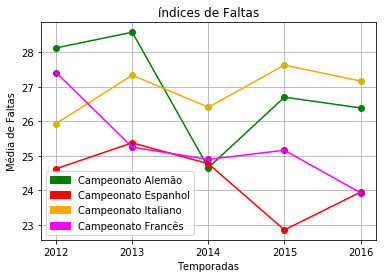

In [208]:
eixo_temporadas = faltas_alema['ano']
plt.plot(eixo_temporadas, faltas_alema['indice'], 'go')
plt.plot(eixo_temporadas, faltas_alema['indice'], 'k-', color='green')

#plt.plot(eixo_temporadas, faltas_inglesa['indice'], 'bo')
#plt.plot(eixo_temporadas, faltas_inglesa['indice'], 'k:', color='blue')

plt.plot(eixo_temporadas, faltas_espanhola['indice'], 'ro')
plt.plot(eixo_temporadas, faltas_espanhola['indice'], 'k-', color='red')

plt.plot(eixo_temporadas, faltas_italiana['indice'], 'yo')
plt.plot(eixo_temporadas, faltas_italiana['indice'], 'k-', color='orange')

plt.plot(eixo_temporadas, faltas_francesa['indice'], 'mo')
plt.plot(eixo_temporadas, faltas_francesa['indice'], 'k-', color='magenta')

plt.title("índices de Faltas")

##plt.axis([eixo_temporadas.min(), eixo_temporadas.max(), 22, 30])

plt.grid(True)
plt.xlabel("Temporadas")
plt.ylabel("Média de Faltas")

verde_patch = mpatches.Patch(color='green', label='Campeonato Alemão')
vermelho_patch = mpatches.Patch(color='red', label='Campeonato Espanhol')
laranja_patch = mpatches.Patch(color='orange', label='Campeonato Italiano')
magenta_patch = mpatches.Patch(color='magenta', label='Campeonato Francês')

plt.legend(handles=[verde_patch, vermelho_patch, laranja_patch, magenta_patch])

# 3.	QUAL A TEMPORADA MAIS VIOLENTA DE CADA LIGA?



# 4.	QUAL JOGADOR MAIS COMETEU FALTAS DE TODAS AS TEMPORADAS E DE TODAS AS LIGAS?

# 5.	ENTRE OS JOGADORES MAIS FALTOSOS DO CAMPEONATO INGLÊS, ITALIANO E O ESPANHOL, QUAL TEM O MELHOR DESEMPENHO?

# 6.	QUAL O PERCENTUAL DE ACERTOS DE ESCANTEIOS POR LIGA?

# 7.	QUAL O PERCENTUAL DE APROVEITAMENTO DOS JOGOS EM CASA ENTRE BARCELONA E REAL MADRID?

# 8.	QUEM TEVE O MELHOR DESEMPENHO ENTRE 2012 E 2016, C. RONALDO OU MESSI?

# 9.	QUAL A FREQUÊNCIA DE CHUTES DE LONGA DISTÂNCIA DAS PARTIDAS DA LIGA ESPANHOLA?

#### Tratando as tentativas (finalizações) da liga espanhola

In [139]:
Longa_distancia = 16 
mais_32_metros = 17
mais_36_metros = 18

#16	Long range
#17	More than 35 yards 
#18	More than 40 yards

1 jarda = 0,9144 metro 

In [80]:
df_tentativas_espanhola_2012 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2012)]
df_tentativas_espanhola_2013 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2013)]
df_tentativas_espanhola_2014 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2014)]
df_tentativas_espanhola_2015 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2015)]
df_tentativas_espanhola_2016 = df_tentativas_temporada[(df_tentativas_temporada.league == espanhola) 
                                                       & (df_tentativas_temporada.season == 2016)]

#### Pegando os eventos que se caracterizam de longa distância

In [153]:
df_longa_esp_2012 = df_tentativas_espanhola_2012[(df_tentativas_espanhola_2012.location == 16) | 
                            (df_tentativas_espanhola_2012.location == 17) | 
                            (df_tentativas_espanhola_2012.location == 18)]

df_longa_esp_2013 = df_tentativas_espanhola_2013[(df_tentativas_espanhola_2013.location == 16) | 
                            (df_tentativas_espanhola_2013.location == 17) | 
                            (df_tentativas_espanhola_2013.location == 18)]

df_longa_esp_2014 = df_tentativas_espanhola_2014[(df_tentativas_espanhola_2014.location == 16) | 
                            (df_tentativas_espanhola_2014.location == 17) | 
                            (df_tentativas_espanhola_2014.location == 18)]

df_longa_esp_2015 = df_tentativas_espanhola_2015[(df_tentativas_espanhola_2015.location == 16) | 
                            (df_tentativas_espanhola_2015.location == 17) | 
                            (df_tentativas_espanhola_2015.location == 18)]

df_longa_esp_2016 = df_tentativas_espanhola_2016[(df_tentativas_espanhola_2016.location == 16) | 
                            (df_tentativas_espanhola_2016.location == 17) | 
                            (df_tentativas_espanhola_2016.location == 18)]

##### Fazendo comparativo entre Real Madrid e Barcelona

In [190]:
chutes_barca_2012 = df_tentativas_espanhola_2012[(df_tentativas_espanhola_2012.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2013 = df_tentativas_espanhola_2013[(df_tentativas_espanhola_2013.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2014 = df_tentativas_espanhola_2014[(df_tentativas_espanhola_2014.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2015 = df_tentativas_espanhola_2015[(df_tentativas_espanhola_2015.event_team == 'Barcelona')]['event_team'].count()
chutes_barca_2016 = df_tentativas_espanhola_2016[(df_tentativas_espanhola_2016.event_team == 'Barcelona')]['event_team'].count()


chutes_real_2012 = df_tentativas_espanhola_2012[(df_tentativas_espanhola_2012.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2013 = df_tentativas_espanhola_2013[(df_tentativas_espanhola_2013.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2014 = df_tentativas_espanhola_2014[(df_tentativas_espanhola_2014.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2015 = df_tentativas_espanhola_2015[(df_tentativas_espanhola_2015.event_team == 'Real Madrid')]['event_team'].count()
chutes_real_2016 = df_tentativas_espanhola_2016[(df_tentativas_espanhola_2016.event_team == 'Real Madrid')]['event_team'].count()


In [195]:
longo_barca_2012 = df_longa_esp_2012[(df_longa_esp_2012.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2013 = df_longa_esp_2013[(df_longa_esp_2013.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2014 = df_longa_esp_2014[(df_longa_esp_2014.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2015 = df_longa_esp_2015[(df_longa_esp_2015.event_team == 'Barcelona')]['event_team'].count()
longo_barca_2016 = df_longa_esp_2016[(df_longa_esp_2016.event_team == 'Barcelona')]['event_team'].count()


longo_real_2012 = df_longa_esp_2012[(df_longa_esp_2012.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2013 = df_longa_esp_2013[(df_longa_esp_2013.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2014 = df_longa_esp_2014[(df_longa_esp_2014.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2015 = df_longa_esp_2015[(df_longa_esp_2015.event_team == 'Real Madrid')]['event_team'].count()
longo_real_2016 = df_longa_esp_2016[(df_longa_esp_2016.event_team == 'Real Madrid')]['event_team'].count()

In [197]:
barca_2012 = longo_barca_2012 / chutes_barca_2012
barca_2013 = longo_barca_2013 / chutes_barca_2013
barca_2014 = longo_barca_2014 / chutes_barca_2014
barca_2015 = longo_barca_2015 / chutes_barca_2015
barca_2016 = longo_barca_2016 / chutes_barca_2016

real_2012 = longo_real_2012 / chutes_real_2012
real_2013 = longo_real_2013 / chutes_real_2013
real_2014 = longo_real_2014 / chutes_real_2014
real_2015 = longo_real_2015 / chutes_real_2015
real_2016 = longo_real_2016 / chutes_real_2016

In [198]:
#Barcelona
df_Barcelona = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice_chute_longo": [barca_2012, barca_2013, barca_2014, 
               barca_2015, barca_2016]
    }
)

In [199]:
#Real Madrid
df_Real = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice_chute_longo": [real_2012, real_2013, real_2014, 
               real_2015, real_2016]
    }
)

In [204]:
df_Real['indice_chute_longo'].mean()

0.010478183757157698

#### Pegando a frequencia de finalizações de longa distancia da liga espanhola de 2012 a 2016

In [169]:
espanhola2012_longo_alcance = df_longa_esp_2012['event_team'].count() / df_tentativas_espanhola_2012['event_team'].count() 
espanhola2013_longo_alcance = df_longa_esp_2013['event_team'].count() / df_tentativas_espanhola_2013['event_team'].count()
espanhola2014_longo_alcance = df_longa_esp_2014['event_team'].count() / df_tentativas_espanhola_2014['event_team'].count() 
espanhola2015_longo_alcance = df_longa_esp_2015['event_team'].count() / df_tentativas_espanhola_2015['event_team'].count() 
espanhola2016_longo_alcance = df_longa_esp_2016['event_team'].count() / df_tentativas_espanhola_2016['event_team'].count() 


In [171]:
#Liga ESPANHOLA
df_longa_distancia_espanhola = pd.DataFrame(
    {
    "ano": ['2012', '2013', '2014', '2015', '2016'],
    "indice": [espanhola2012_longo_alcance, espanhola2013_longo_alcance, espanhola2014_longo_alcance, 
               espanhola2015_longo_alcance, espanhola2016_longo_alcance]
    }
)

In [174]:
df_longa_distancia_espanhola

,ano,indice
0,2012,0.023449
1,2013,0.020454
2,2014,0.021914
3,2015,0.018708
4,2016,0.017286


#### Plotando um gráfico com os valores das temporadas

Text(0,0.5,'Média de Chutes Longos')

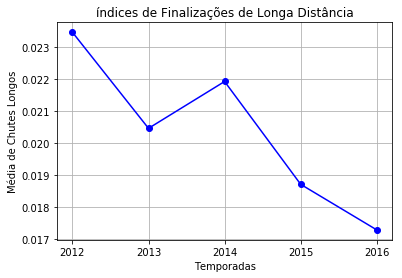

In [205]:
eixo_temporadas = df_longa_distancia_espanhola['ano']
plt.plot(eixo_temporadas, df_longa_distancia_espanhola['indice'], 'go', color='blue')
plt.plot(eixo_temporadas, df_longa_distancia_espanhola['indice'], 'k-', color='blue')

plt.title("índices de Finalizações de Longa Distância")
plt.grid(True)
plt.xlabel("Temporadas")
plt.ylabel("Média de Chutes Longos")

# 10.	QUAL CLUBE TEM MAIORES INDICES DE CHUTES A LONGA DISTÂNCIA, REAL MADRID OU BARCELONA?

Text(0,0.5,'Média de Chutes Longos')

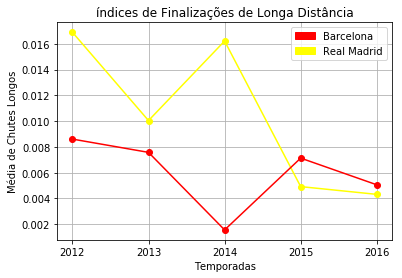

In [207]:
eixo_temporadas = df_Real['ano']
plt.plot(eixo_temporadas, df_Real['indice_chute_longo'], 'go', color='yellow')
plt.plot(eixo_temporadas, df_Real['indice_chute_longo'], 'k-', color='yellow')

plt.plot(eixo_temporadas, df_Barcelona['indice_chute_longo'], 'ro')
plt.plot(eixo_temporadas, df_Barcelona['indice_chute_longo'], 'k-', color='red')

plt.title("índices de Finalizações de Longa Distância")
plt.grid(True)

amarelo_patch = mpatches.Patch(color='yellow', label='Real Madrid')
vermelho_patch = mpatches.Patch(color='red', label='Barcelona')

plt.legend(handles=[vermelho_patch, amarelo_patch])

plt.xlabel("Temporadas")
plt.ylabel("Média de Chutes Longos")